# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [4]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 1.2 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6751652 sha256=6e78b6e92c00e82e784ff8f9112c5d9bb039524d98706199b2dab9b7b70f7e39
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet


In [5]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [6]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet 

In [8]:
#Initializing Plotly
import plotly.io as pio

## Importing the Dataset & Exploring it

In [9]:
df = pd.read_csv('TSLA.csv')

In [ ]:
#read_csv function from pandas

In [10]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [13]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,414.739109,425.323268,402.764717,415.137952,415.137952,6.178552e+07
std,234.908560,239.374833,229.101662,234.987820,234.987820,3.306128e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,194.901001,199.384003,188.566994,193.368995,193.368995,3.628290e+07
50%,408.951996,418.700012,401.660004,408.500000,408.500000,5.561600e+07
75%,606.549988,627.795013,586.750000,607.234985,607.234985,8.131825e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [14]:
px.area(df, x="Date", y="Close")

In [15]:
px.line(df, x="Date", y="Close")

In [16]:
px.area(df, x="Date", y="Volume")

In [18]:
px.bar(df, y="Volume")

In [19]:
px.box(df, y="Close")

# Understanding Facebook Prophet

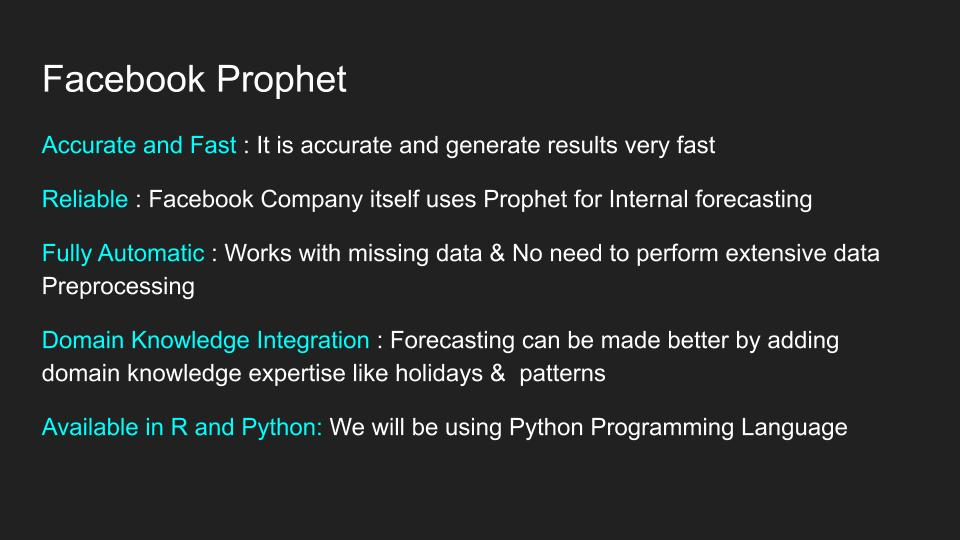

## Data Preperation

In [20]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [24]:
columns=["Date","Close"]
ndf  = pd.DataFrame(df, columns = columns)

In [25]:
ndf

,Date,Close
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


In [26]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [27]:
prophet_df

,ds,y
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


## Creating Facebook Prophet Model

In [28]:
m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [29]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

In [30]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,65.592384,-22.061274,144.563963,65.592384,65.592384,-5.865511,-5.865511,-5.865511,-5.865511,-5.865511,-5.865511,0.0,0.0,0.0,59.726873
1,2020-03-17,67.387841,-30.711408,154.336409,67.387841,67.387841,-2.388676,-2.388676,-2.388676,-2.388676,-2.388676,-2.388676,0.0,0.0,0.0,64.999165
2,2020-03-18,69.183298,-20.936734,154.241349,69.183298,69.183298,-3.496043,-3.496043,-3.496043,-3.496043,-3.496043,-3.496043,0.0,0.0,0.0,65.687256
3,2020-03-19,70.978755,-15.736253,154.261669,70.978755,70.978755,-3.844838,-3.844838,-3.844838,-3.844838,-3.844838,-3.844838,0.0,0.0,0.0,67.133917
4,2020-03-20,72.774212,-21.206240,148.027172,72.774212,72.774212,-7.760562,-7.760562,-7.760562,-7.760562,-7.760562,-7.760562,0.0,0.0,0.0,65.013650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-04-07,900.261779,811.289992,981.379898,899.080536,901.342173,-3.496043,-3.496043,-3.496043,-3.496043,-3.496043,-3.496043,0.0,0.0,0.0,896.765737
277,2021-04-08,902.718796,814.006567,986.048821,901.482928,903.901351,-3.844838,-3.844838,-3.844838,-3.844838,-3.844838,-3.844838,0.0,0.0,0.0,898.873958
278,2021-04-09,905.175813,803.542037,982.383846,903.882256,906.424523,-7.760562,-7.760562,-7.760562,-7.760562,-7.760562,-7.760562,0.0,0.0,0.0,897.415251
279,2021-04-10,907.632829,829.253817,1005.958728,906.264226,908.967255,11.677815,11.677815,11.677815,11.677815,11.677815,11.677815,0.0,0.0,0.0,919.310644


In [31]:
px.line(forecast, x='ds', y='yhat')

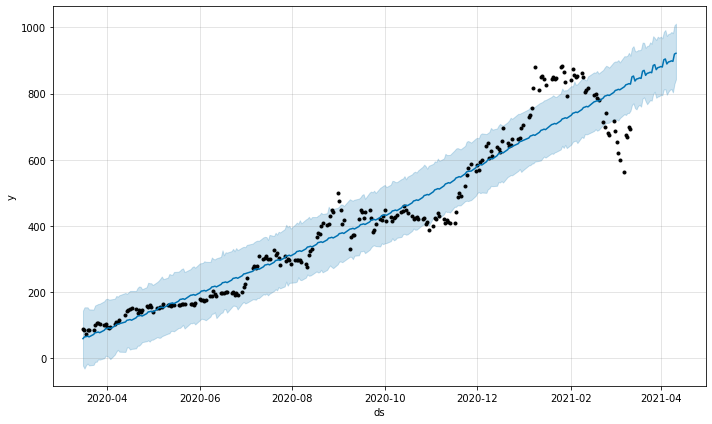

In [32]:
figure = m.plot(forecast, xlabel = 'ds', ylabel='y')

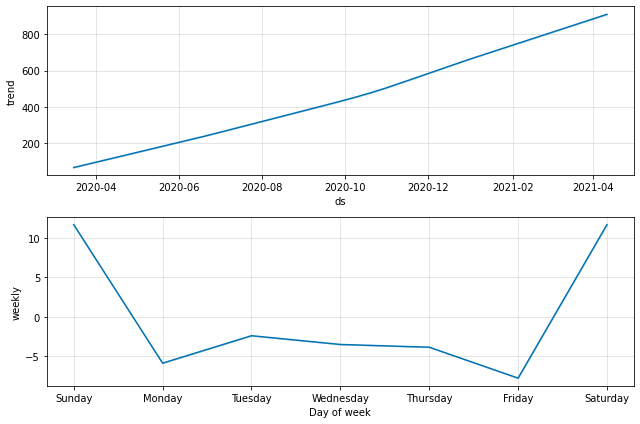

In [33]:
figure2 = m.plot_components(forecast)

In [35]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Downloading the Forecast data